### Elsa RUELLE - Saphya EL OUAHABI

## Multiple Linear Regression

### IMPORT

In [1]:
# importing pandas
import pandas as pd
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# importing module
from sklearn.linear_model import LinearRegression
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Dataset A1-turbine

In [2]:
df1 = pd.read_csv('Raw_datasets/A1-turbine.txt', sep='\t')
df1

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,624.0,89.16,89.765,3.5,2512.85
1,628.0,93.16,93.765,3.5,2583.79
2,602.0,67.84,66.415,6.5,3748.77
3,599.0,64.84,63.415,6.5,3520.65
4,630.0,94.69,93.540,8.0,6673.84
...,...,...,...,...,...
446,605.0,71.10,70.550,4.0,2337.68
447,621.0,85.59,83.840,9.0,6451.24
448,607.0,71.69,70.540,8.0,4806.83
449,612.0,76.84,76.415,6.5,4450.58


### Normalization


In [3]:
s_min=0.1
s_max=1
def norm(df_input):
    return(s_min+((s_max-s_min)/(df_input.max() - df_input.min()))*(df_input - df_input.min()))

In [4]:
columns= df1.columns
for col in columns:
    df1[col]=norm(df1[col])
df1

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.861538,0.839041,0.863880,0.175,0.234961
1,0.953846,0.930365,0.952126,0.175,0.246390
2,0.353846,0.352283,0.348744,0.625,0.434081
3,0.284615,0.283790,0.282559,0.625,0.397329
4,1.000000,0.965297,0.947163,0.850,0.905342
...,...,...,...,...,...
446,0.423077,0.426712,0.439968,0.250,0.206739
447,0.792308,0.757534,0.733166,1.000,0.869479
448,0.469231,0.440183,0.439748,0.850,0.604547
449,0.584615,0.557763,0.569359,0.625,0.547151


### Creation of training and test datasets

"power_of_hydroelectrical_turbine" is the variable that we want to predict.

In [5]:
#separate the other attributes from the predicting attribute
x1 = df1.drop('power_of_hydroelectrical_turbine', axis=1)
#separate the predicting attribute into Y for model training 
y1 = df1['power_of_hydroelectrical_turbine']

We split our data into training and testing parts.
We select 85% of our data for the training part and 15% for the tests.

In [6]:
# splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.15, random_state=42)

### Prediction

We apply the linear regression model on our training data.

In [7]:
# creating an object of LinearRegression class
LR1 = LinearRegression()
# fitting the training data
LR1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We predict our data from x_test:

In [8]:
y1_prediction =  LR1.predict(x1_test)
y1_prediction

array([0.79784975, 0.4352314 , 0.62265026, 0.6737644 , 0.28096067,
       0.70829179, 0.28674431, 0.40650752, 0.65270157, 0.45221526,
       0.238501  , 0.63963413, 0.54197242, 0.39801559, 0.22730077,
       0.51237241, 0.44095895, 0.57594015, 0.70331916, 0.23000907,
       0.38853023, 0.70365317, 0.38103172, 0.34607056, 0.67432405,
       0.72912897, 0.51738636, 0.72991427, 0.47828738, 0.54286216,
       0.65678053, 0.82332555, 0.80634168, 0.4868966 , 0.6866693 ,
       0.27076873, 0.38422561, 0.29511895, 0.0366487 , 0.85729329,
       0.49191055, 0.56294441, 0.39000734, 0.28945261, 0.50040249,
       0.87427715, 0.37650146, 0.84416273, 0.55984603, 0.58443209,
       0.48677931, 0.69477305, 0.78008058, 0.07061644, 0.42668528,
       0.43246701, 0.17634916, 0.34706399, 0.55895628, 0.4607072 ,
       0.14661433, 0.2877526 , 0.39849928, 0.69130792, 0.02815677,
       0.77237394, 0.74225952, 0.86963854])

### Cross validation

In [9]:
scores1 = cross_val_score(LR1, x1, y1)
scores1

array([0.97489236, 0.97894676, 0.96153066, 0.97012587, 0.97335748])

In [10]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.97 accuracy with a standard deviation of 0.01


### Relative Absolute Error

In [11]:
error_rate1 = 100 * ((sum(abs(y1_prediction-y1_test)))/sum(y1_test));
print("Error rate MLR : ",error_rate1 , "%")

Error rate MLR :  4.830087694436299 %


### Creation of the Dataset

In [12]:
dataset1 = pd.DataFrame({'prediction' : y1_prediction, 'real_value' : y1_test})

In [13]:
dataset1.to_csv('Prediction_datasets/A1-turbine_Results.csv',index=False)

<function matplotlib.pyplot.show(*args, **kw)>

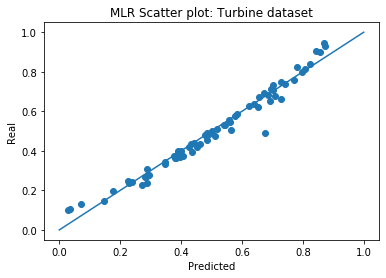

In [14]:
plt.scatter(y1_prediction,y1_test)
plt.plot( [0,1],[0,1] )
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('MLR Scatter plot: Turbine dataset')
plt.show


# Dataset A1-synthetic

In [15]:
df2 = pd.read_csv('Raw_datasets/A1-synthetic.txt', sep='\t')
df2

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,37.344110,10.542156,0.969185,3.568534,96.798733,3.429026,75.810196,0,20.002459,11.805369
1,4.089849,11.894301,0.467775,1.279044,100.149383,3.190073,76.423095,0,12.702628,5.125025
2,-32.333439,10.968631,0.238486,1.410745,100.642074,3.093934,78.758727,1,10.723848,3.218553
3,-45.632977,11.509606,0.924938,3.404069,105.963016,2.884269,83.027750,0,19.946593,12.955092
4,-41.543394,10.117186,0.315180,1.020120,97.371423,2.815820,77.194463,0,11.105024,1.919094
...,...,...,...,...,...,...,...,...,...,...
995,3.792427,10.567199,0.912737,3.909415,98.701308,3.222058,77.648206,0,18.903414,11.265913
996,-15.036910,11.639085,0.988515,3.202736,107.622269,3.236556,84.364686,0,21.473280,15.061569
997,3.448645,10.819087,0.798970,3.763737,100.801840,2.326508,79.251359,0,17.006395,11.029825
998,44.874246,10.272157,0.061187,1.267862,99.931950,2.979643,79.454761,0,10.138457,1.580719


### Data normalization

In [16]:
columns= df2.columns
for col in columns:
    df2[col]=norm(df2[col])
df2

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,0.886901,0.344035,0.972501,0.870515,0.437269,0.904911,0.473432,0.1,0.846795,0.771958
1,0.587111,0.952779,0.521042,0.183067,0.534256,0.772721,0.490698,0.1,0.296277,0.415596
2,0.258751,0.536037,0.314595,0.222612,0.548518,0.719537,0.556495,1.0,0.147048,0.313895
3,0.138854,0.779587,0.932662,0.821132,0.702537,0.603549,0.676757,0.1,0.842582,0.833290
4,0.175722,0.152711,0.383648,0.105322,0.453846,0.565683,0.512428,0.1,0.175794,0.244576
...,...,...,...,...,...,...,...,...,...,...
995,0.584429,0.355310,0.921676,0.972868,0.492341,0.790415,0.525211,0.1,0.763910,0.743181
996,0.414681,0.837879,0.989905,0.760679,0.750566,0.798436,0.714419,0.1,0.957717,0.945660
997,0.581330,0.468711,0.819242,0.929126,0.553142,0.294993,0.570373,0.1,0.620846,0.730587
998,0.954786,0.222480,0.154959,0.179710,0.527963,0.656310,0.576103,0.1,0.102900,0.226525


### Creation of training and test datasets

In [17]:
#separate the other attributes from the predicting attribute
x2 = df2.drop('z', axis=1)
#separte the predicting attribute into Y for model training 
y2 = df2['z']

In [18]:
# splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state=42)

### Prediction

In [19]:
# creating an object of LinearRegression class
LR2 = LinearRegression()
# fitting the training data
LR2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y2_prediction =  LR2.predict(x2_test)
y2_prediction

array([0.53694937, 0.3326174 , 0.31320402, 0.90193933, 0.31378402,
       0.83127054, 0.89246857, 0.31288084, 0.57273629, 0.54240888,
       0.59691975, 0.7989518 , 0.19513202, 0.62014003, 0.83681037,
       0.50354933, 0.7315881 , 0.87565331, 0.54932697, 0.32081058,
       0.40493693, 0.2500696 , 0.68437537, 0.29603701, 0.46866805,
       0.60636177, 0.26184775, 0.79414439, 0.22259482, 0.93425203,
       0.80430096, 0.3202553 , 0.2886946 , 0.55090739, 0.42669153,
       0.27898658, 0.30194851, 0.61626646, 0.57329515, 0.36445818,
       0.28110785, 0.47525555, 0.49427783, 0.77818266, 0.36974263,
       0.54815476, 0.30212511, 0.27142273, 0.71549145, 0.76835901,
       0.49548001, 0.64051481, 0.72941995, 0.39606984, 0.44272654,
       0.25886983, 0.3595226 , 0.33796083, 0.58514583, 0.91480233,
       0.34478581, 0.24030596, 0.68845774, 0.44972537, 0.65219566,
       0.31381315, 0.22841135, 0.36059973, 0.59634685, 0.57246162,
       0.80647188, 0.35528517, 0.87398001, 0.40892964, 0.35799

### Cross validation

In [21]:
scores2 = cross_val_score(LR2, x2, y2, cv=5)
scores2

array([0.9720814 , 0.97437945, 0.97300237, 0.97219717, 0.97691594])

In [22]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.97 accuracy with a standard deviation of 0.00


### Relative Absolute Error

In [23]:
error_rate2 = 100 * ((sum(abs(y2_prediction-y2_test)))/sum(y2_test));
print("Error rate MLR : ",error_rate2 , "%")

Error rate MLR :  5.56435656503143 %


### Creation of the Dataset

In [24]:
dataset2 = pd.DataFrame({'prediction' : y2_prediction, 'real_value' : y2_test})

In [25]:
dataset2.to_csv('Prediction_datasets/A1-synthetic_Results.csv',index=False)

<function matplotlib.pyplot.show(*args, **kw)>

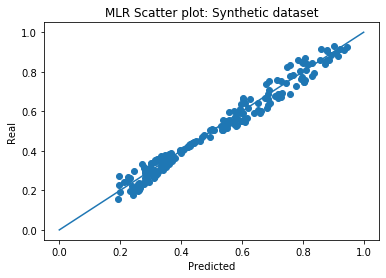

In [26]:
plt.scatter(y2_prediction,y2_test)
plt.plot( [0,1],[0,1] )
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('MLR Scatter plot: Synthetic dataset')
plt.show

# Dataset insurance_dataset_1

In [27]:
df = pd.read_csv('Normalized_datasets/insurance_dataset_1.csv')
df

,age,bmi,children,smoker,charges,IsFemale,IsMale
0,0.021739,0.387788,0.0,1,0.472641,1,0
1,0.000000,0.578435,0.2,0,0.018101,0,1
2,0.217391,0.553426,0.6,0,0.099775,0,1
3,0.326087,0.219065,0.0,0,0.625547,0,1
4,0.304348,0.419617,0.0,0,0.082306,0,1
...,...,...,...,...,...,...,...
1188,0.695652,0.487496,0.6,0,0.284210,0,1
1189,0.000000,0.518350,0.0,0,0.032506,1,0
1190,0.000000,0.678467,0.0,0,0.015231,1,0
1191,0.065217,0.319584,0.0,0,0.026568,1,0


### Data normalization

In [28]:
columns= df.columns
for col in columns:
    df[col]=norm(df[col])
df

,age,bmi,children,smoker,charges,IsFemale,IsMale
0,0.119565,0.449009,0.10,1.0,0.525377,1.0,0.1
1,0.100000,0.620591,0.28,0.1,0.116291,0.1,1.0
2,0.295652,0.598084,0.64,0.1,0.189797,0.1,1.0
3,0.393478,0.297158,0.10,0.1,0.662992,0.1,1.0
4,0.373913,0.477655,0.10,0.1,0.174075,0.1,1.0
...,...,...,...,...,...,...,...
1188,0.726087,0.538746,0.64,0.1,0.355789,0.1,1.0
1189,0.100000,0.566515,0.10,0.1,0.129255,1.0,0.1
1190,0.100000,0.710620,0.10,0.1,0.113708,1.0,0.1
1191,0.158696,0.387626,0.10,0.1,0.123911,1.0,0.1


### Creation of training and test datasets

In [29]:
#separate the other attributes from the predicting attribute
x = df.drop(['charges'], axis=1)
#separte the predicting attribute into Y for model training 
y = df['charges']

In [30]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Prediction

In [31]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_prediction =  LR.predict(x_test)
y_prediction

array([0.31584516, 0.2226819 , 0.13488017, 0.24547929, 0.14521793,
       0.32242793, 0.38604988, 0.42636653, 0.15179607, 0.74966747,
       0.19559101, 0.72223897, 0.6557566 , 0.40484208, 0.22631209,
       0.17700314, 0.15596219, 0.72618263, 0.21499753, 0.63422551,
       0.39063464, 0.23140854, 0.34806639, 0.13941172, 0.12440564,
       0.41617209, 0.19879016, 0.20035285, 0.26835537, 0.40800964,
       0.25312118, 0.2529614 , 0.39677236, 0.19637213, 0.34020996,
       0.29417924, 0.20426762, 0.17260187, 0.58879496, 0.45712172,
       0.32629213, 0.20949334, 0.43559049, 0.14155639, 0.16495286,
       0.44539317, 0.2278195 , 0.42085469, 0.38785722, 0.1484651 ,
       0.7693411 , 0.20086692, 0.81466539, 0.64196679, 0.35267362,
       0.37408702, 0.26184574, 0.26689245, 0.24557489, 0.36707497,
       0.38490982, 0.43665688, 0.42781648, 0.20232375, 0.22607301,
       0.46736876, 0.69083741, 0.17860268, 0.25694428, 0.15500161,
       0.44243049, 0.39122633, 0.8547099 , 0.28125203, 0.40198

### Cross validation

In [33]:
scores = cross_val_score(LR, x, y, cv=5)
scores

array([0.66331261, 0.47935251, 0.65034148, 0.56130064, 0.60995395])

In [34]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.07


### Relative Absolute Error

In [35]:
error_rate = 100 * ((sum(abs(y_prediction-y_test)))/sum(y_test));
print("Error rate MLR : ",error_rate , "%")

Error rate MLR :  20.73888490261809 %


### Creation of the Dataset

In [36]:
dataset3 = pd.DataFrame({'prediction' : y_prediction, 'real_value' : y_test})

In [37]:
dataset3.to_csv('Prediction_datasets/insurance_dataset_Results.csv',index=False)

<function matplotlib.pyplot.show(*args, **kw)>

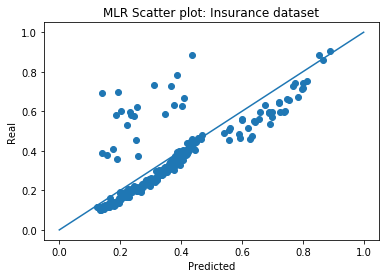

In [38]:
plt.scatter(y_prediction,y_test)
plt.plot( [0,1],[0,1] )
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('MLR Scatter plot: Insurance dataset')
plt.show